# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_3_FIR_fiter_and_frequency_response

## 實驗十二
### FIR濾波器的應用
### 執行以下程式碼並觀察輸出

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

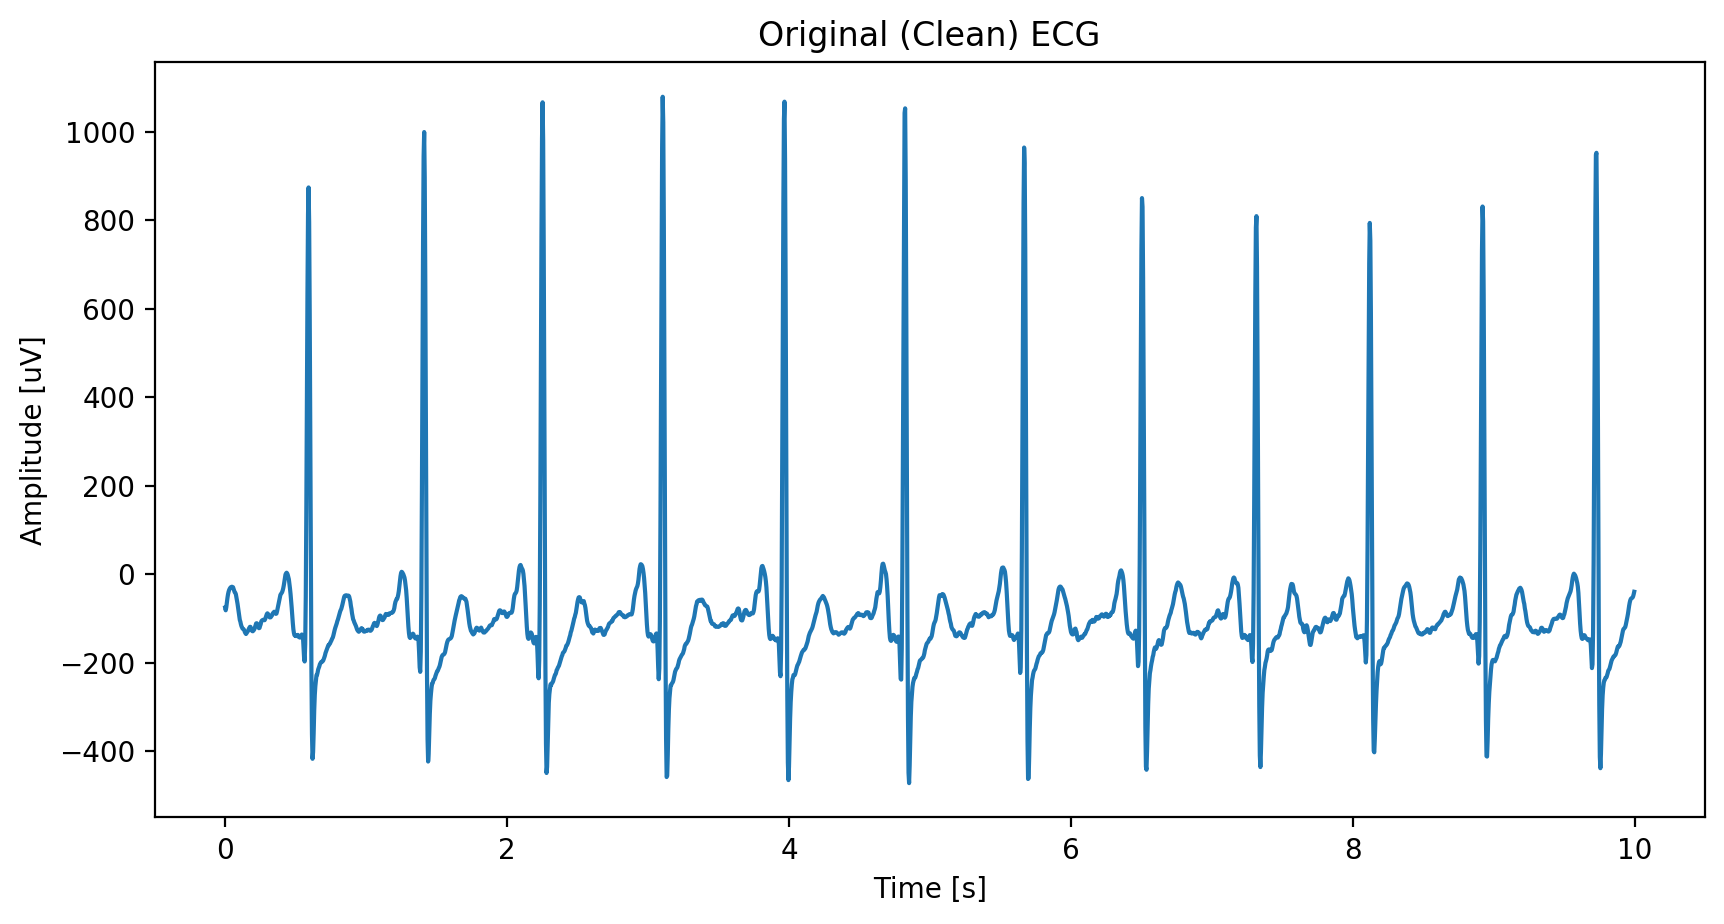

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(t, ecg)
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十二
### 上圖為長度10秒之心電圖波形，用取樣頻率fs=250Hz 取樣，信號單位為uV
### <BR>(1) 參考實驗十一為將信號取快速傅利葉轉換, 繪製出信號頻譜，橫軸以類比頻率(Hz)來表示。

### <BR>(2) 產生一電力線偶合雜訊cos 波，Amplitude: 250uV, Phase: 0 rad, Frequency: 60 Hz，並繪製出受雜訊干擾之心電圖波形ecg_n

### <BR>(3) 繪製出受雜訊干擾的心電圖頻譜，橫軸以類比頻率(Hz)來表示。
    

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

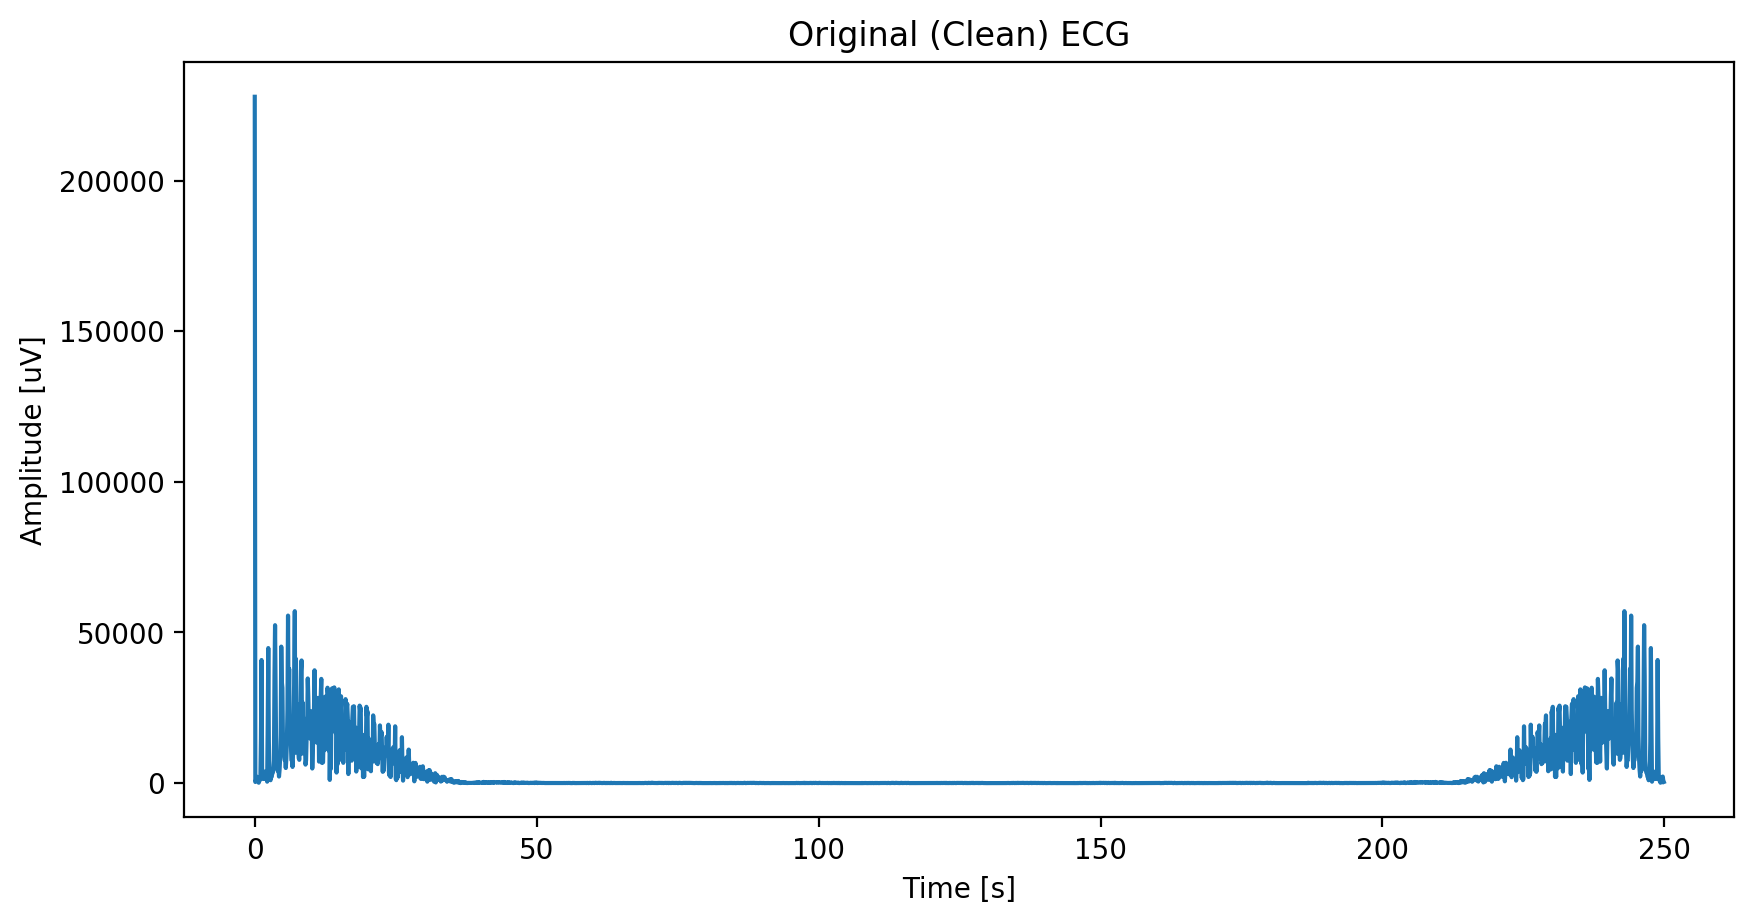

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)

xf = np.fft.fft(ecg)

plt.figure(figsize=(10,5), dpi=200)
plt.plot(t*25, abs(xf))
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

ECG samples: (2500,)
Sampling frequency: 250


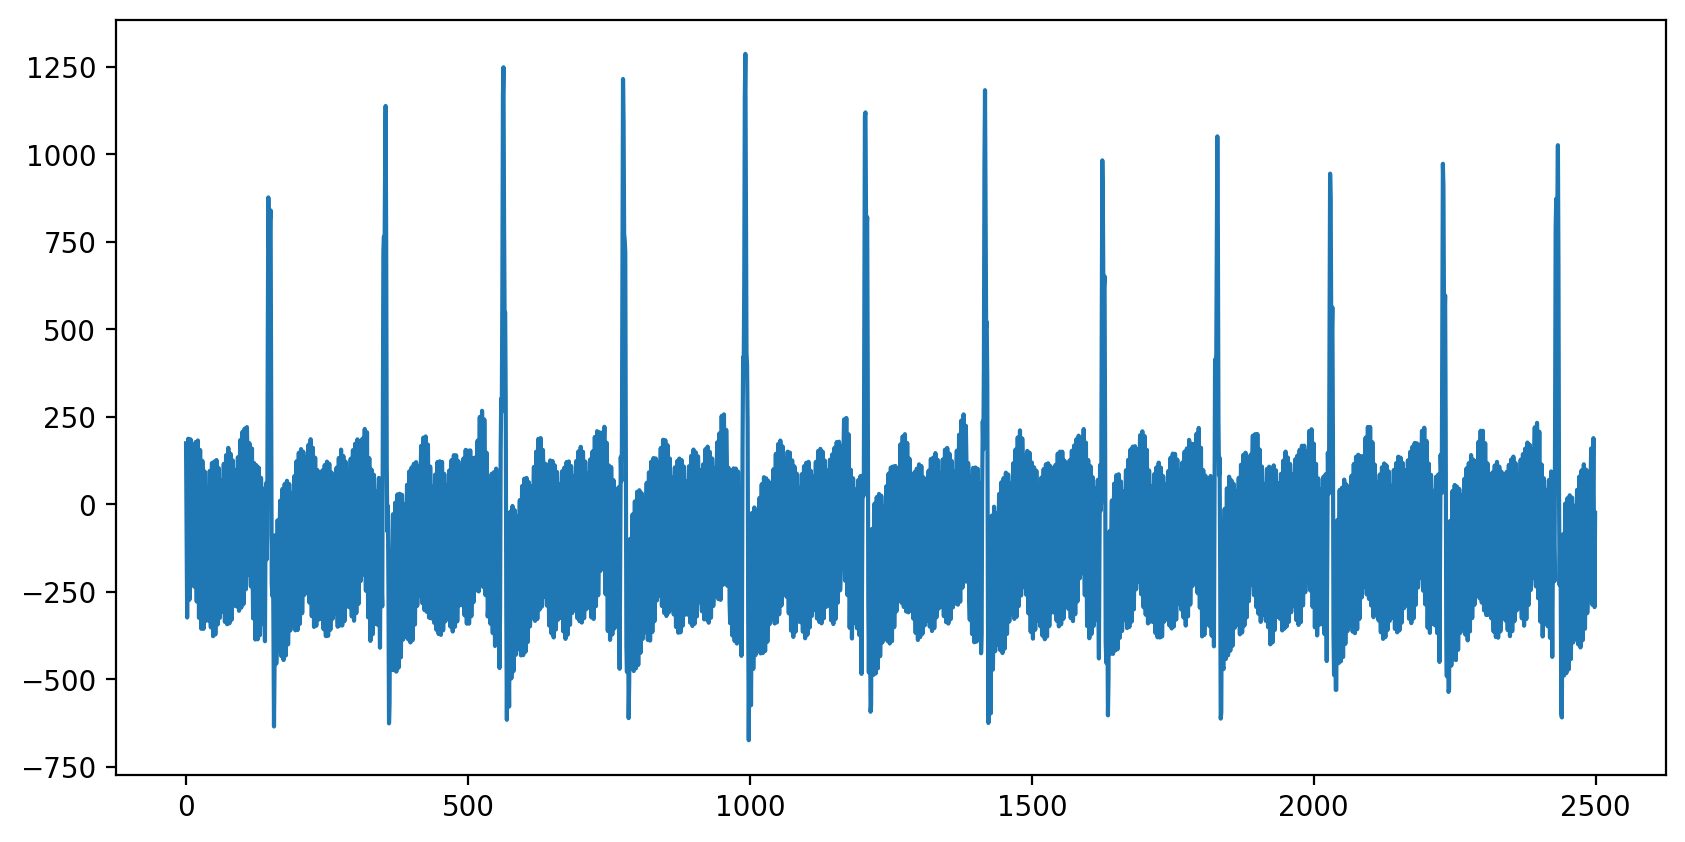

In [53]:
ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)


xf = np.fft.fft(ecg)

plt.figure(figsize=(10,5), dpi=200)
plt.plot(t*250, ecg+x)

ECG samples: (2500,)
Sampling frequency: 250
312505.59100911225 24.0


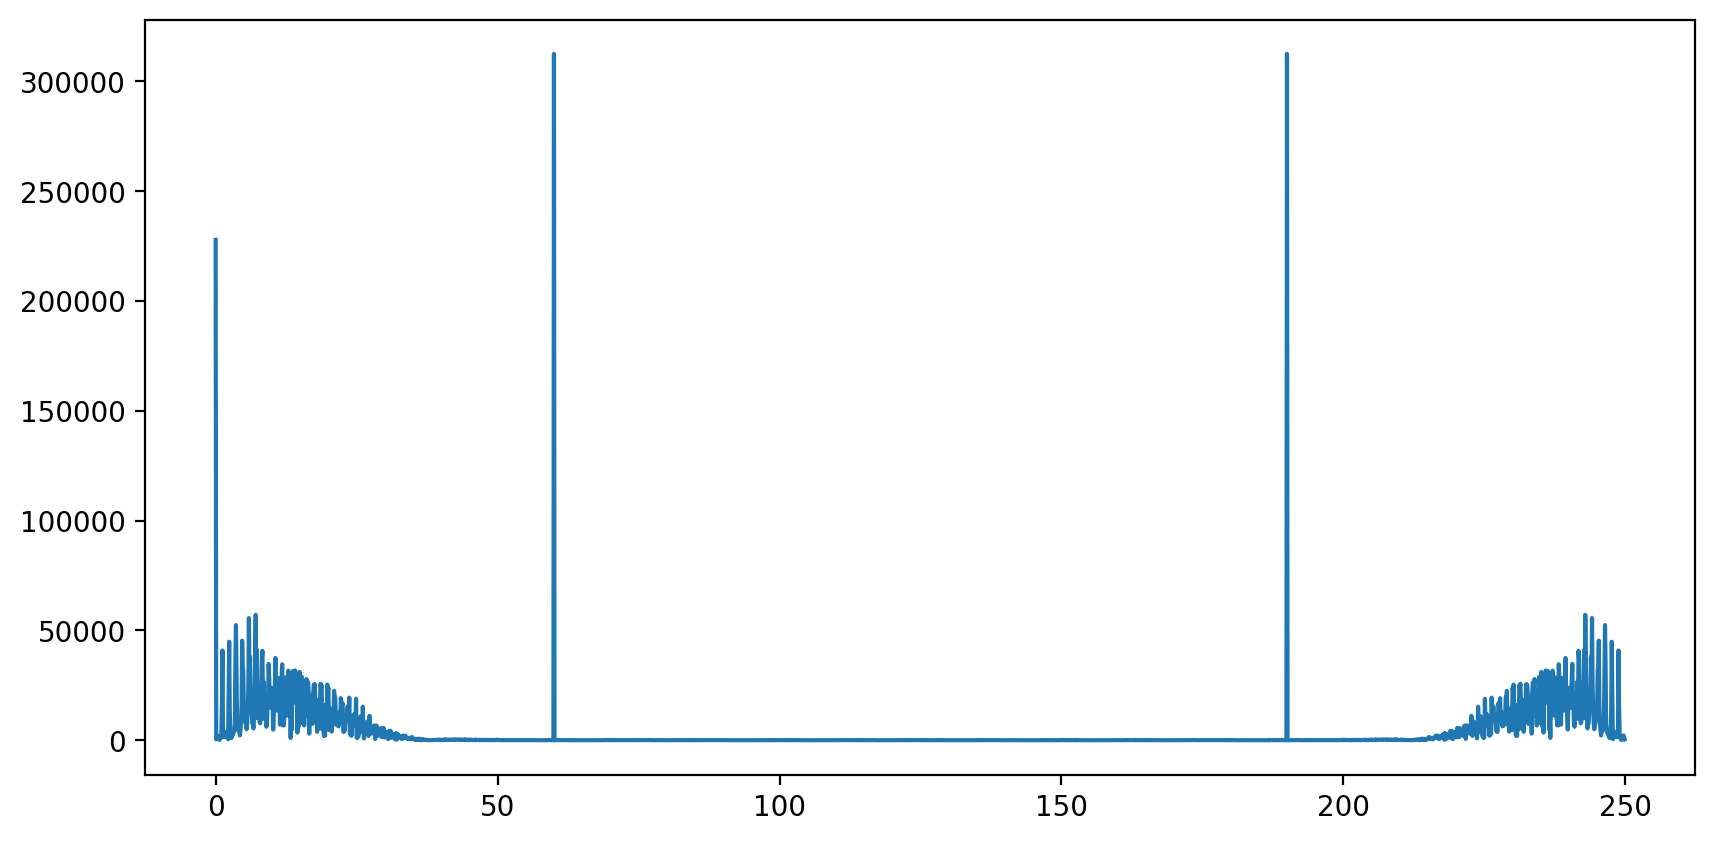

In [54]:
ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)

xf = np.fft.fft(ecg+x)

plt.figure(figsize=(10,5), dpi=200)
plt.plot(t*25, abs(xf))
print(np.max(abs(xf)),np.argmax(abs(xf))/25)

## 實驗十三
### 傅利葉以及反傅利葉
### 下圖之程式碼主要目的是將ecg轉換至頻率空間之後，將直流成份濾除後，再轉回時域
### 執行以下程式碼並觀察輸出

Text(0.5, 0, 'Time [s]')

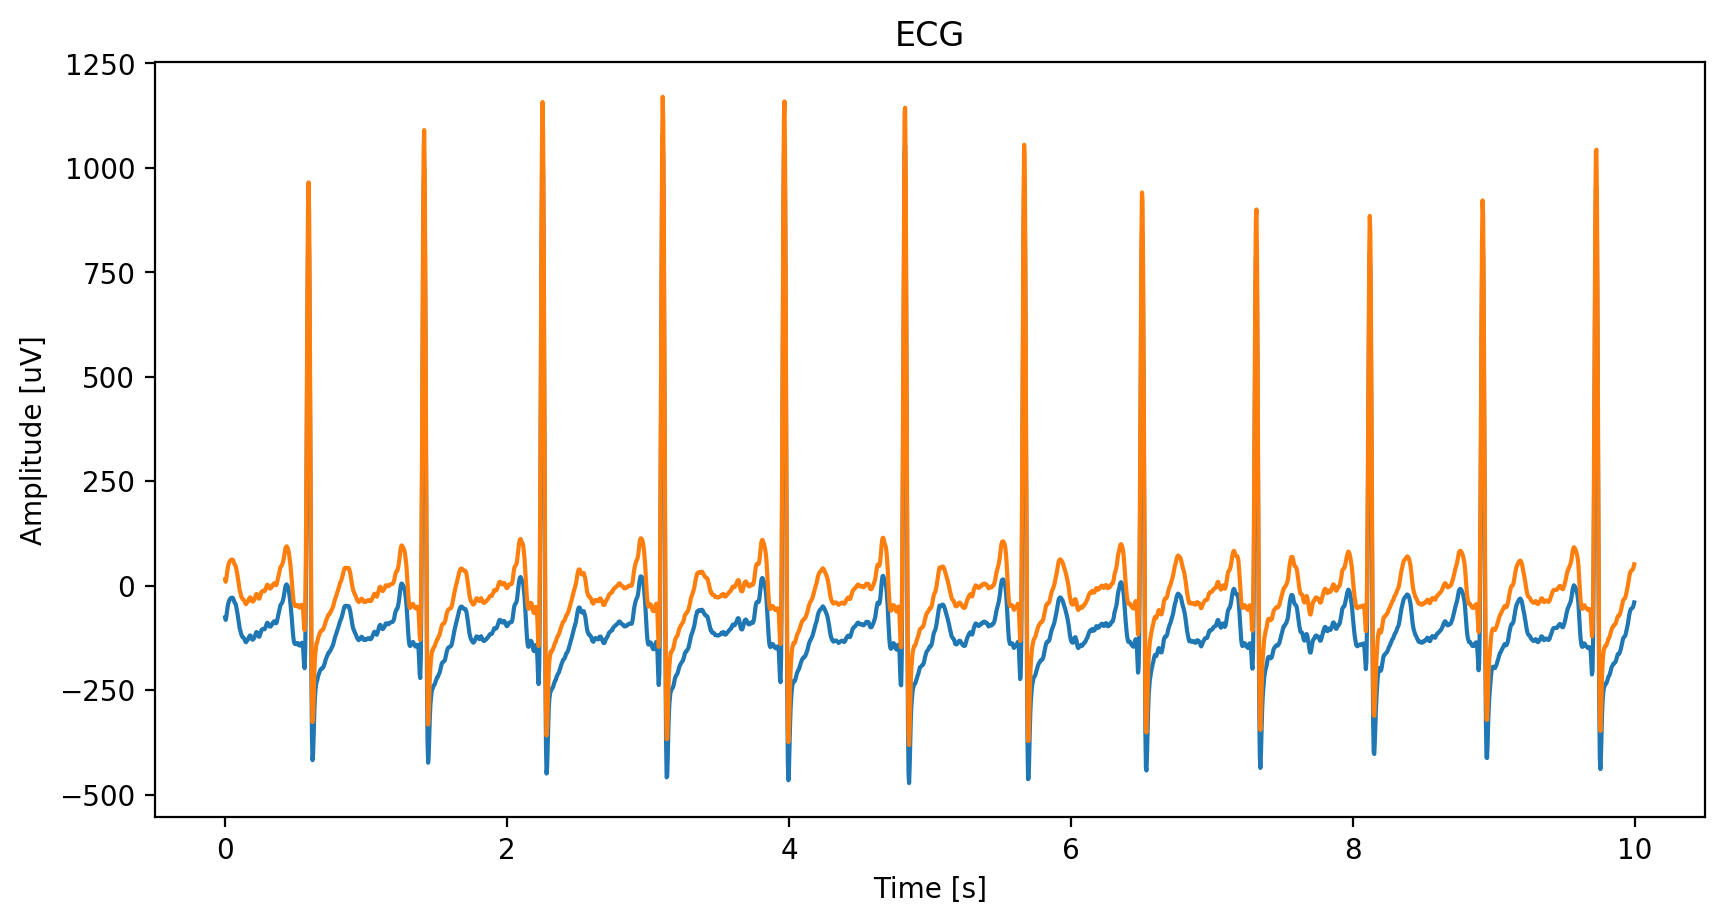

In [55]:
xf = np.fft.fft(ecg)
xf[0] = 0
ecg2 = np.fft.ifft(xf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg2)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十三

### <BR>(1) 參考實驗十三範例，先將受雜訊干擾之ecg_n，轉換至頻域後，將60Hz成份過濾掉再轉回時域，得到ecg_filtered。繪出ecg_filtered之時域及頻域信號

### <BR>(2) 參考實驗十一，設計一個三點平均濾波器 FIR filter, bk = [1/3, 1/3, 1/3] 並將ecg_n送入觀察結果

    

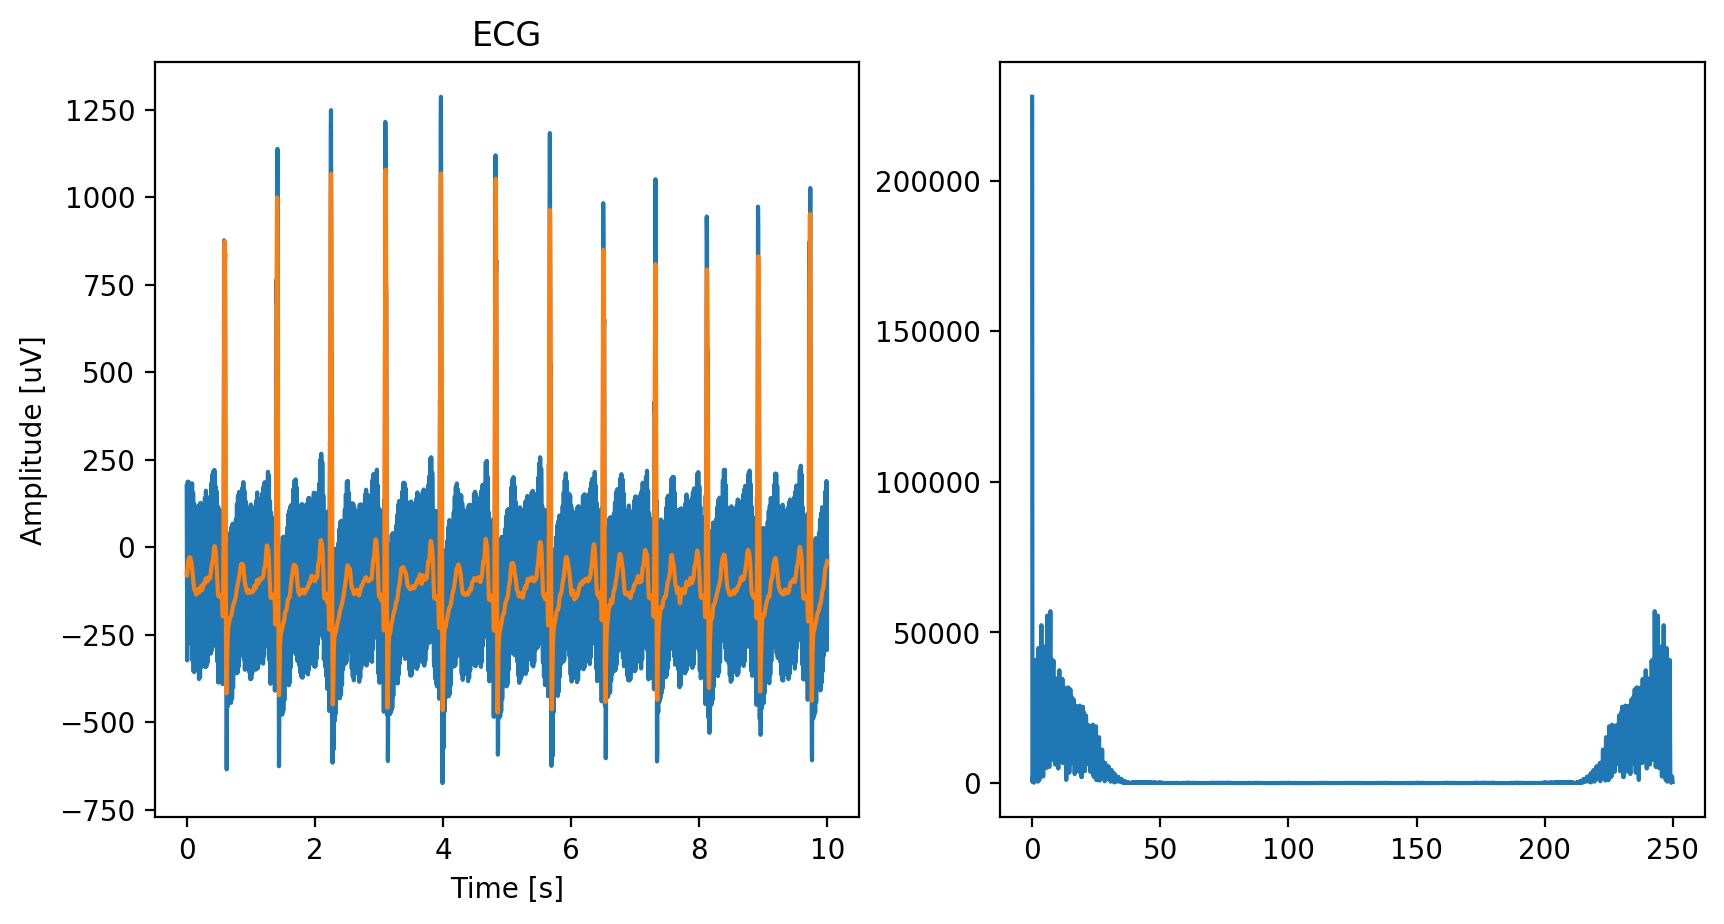

In [56]:
xf = np.fft.fft(ecg+x)
xf[600] = 0
xf[1900] = 0
ecg2 = np.fft.ifft(xf)
plt.figure(figsize=(10, 5), dpi=200)

plt.subplot(121)
plt.plot(t, ecg+x)
plt.plot(t, ecg2)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

plt.subplot(122)
xf = np.fft.fft(ecg2)
plt.plot(t*25, abs(xf))

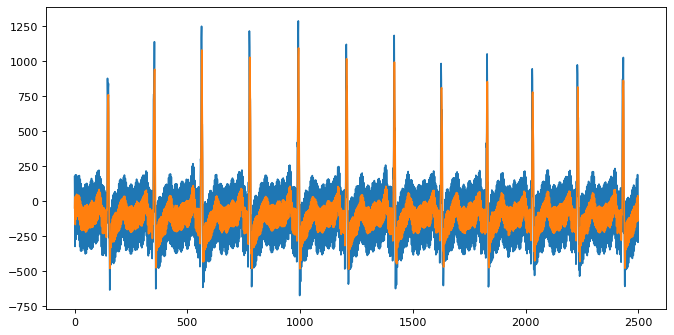

In [60]:


plt.figure(figsize=[10, 5], dpi=80)

plt.plot(ecg+x)
a = ecg+x
y = a*0
for i in range(len(a)):
    y[i] = 1/3*(a[i] + a[i-1] + a[i-2])
plt.plot(y)


## 實驗十四
### 頻率響應
### 下面程式用來觀察頻率為20Hz的信號，經過fs=250Hz 取樣，並送入3點平均濾波器後，振輻的改變。


Amplitude of x: 1.0
Amplitude of y: 0.9175377866959373


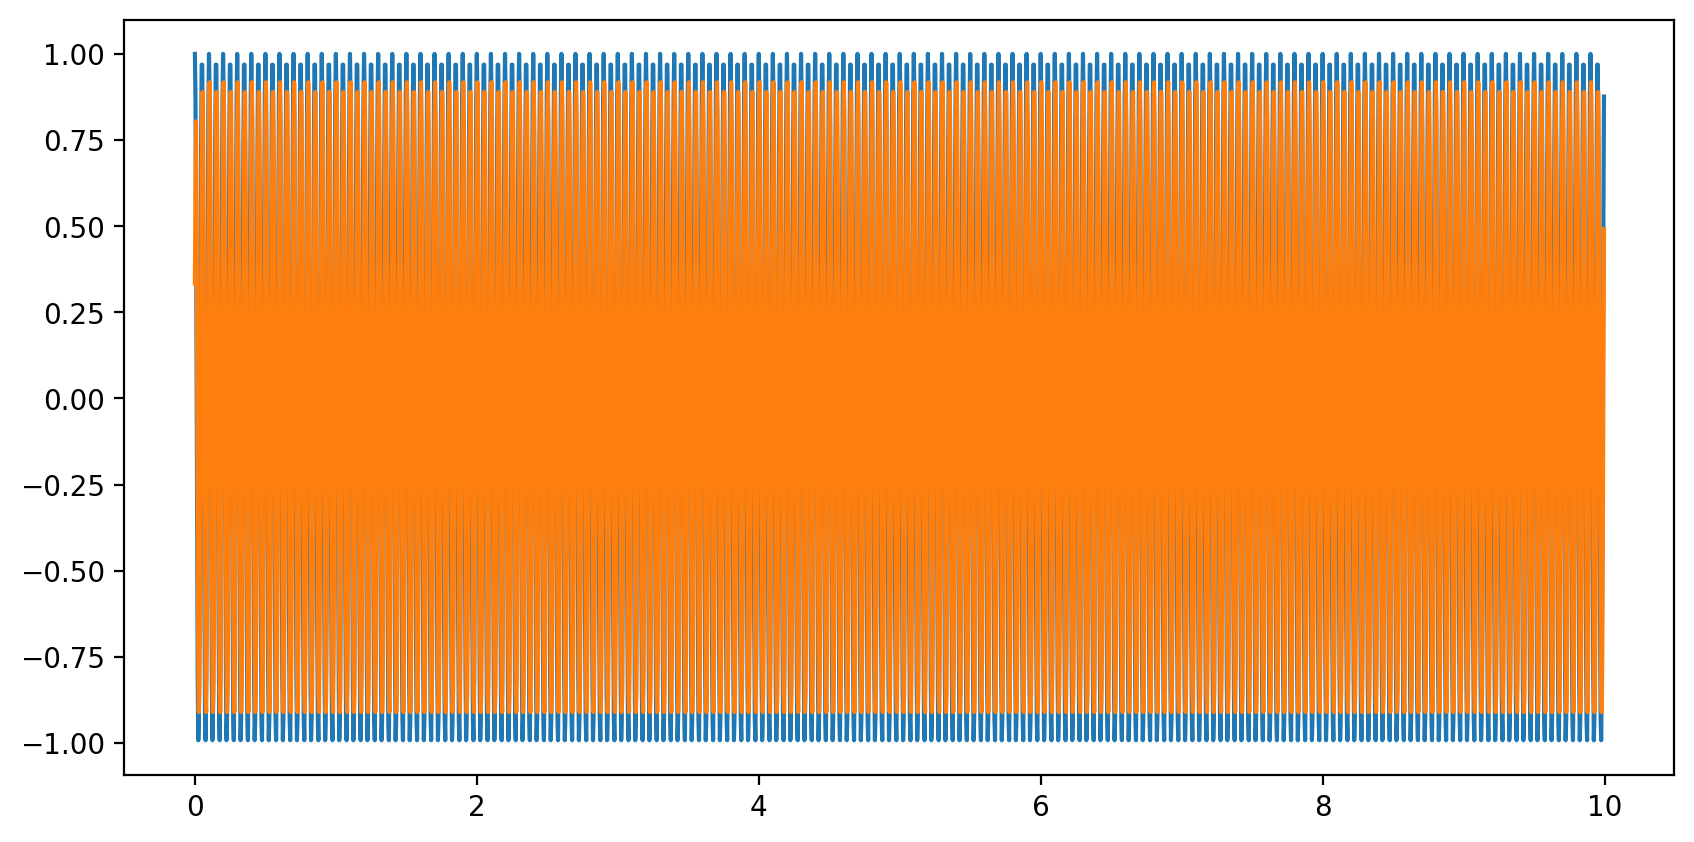

In [35]:
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*20*t)
y = signal.lfilter([1/3, 1/3, 1/3], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)

## 問題十四

### <BR>(1) 使用max來觀察弦波的振輻永遠正確嗎？
    
### <BR>(2) 改變輸入信號x之頻率由 0, 1, 2 ... 125Hz，觀察三點平均濾波器之輸出，並繪製出此FIR濾波器之等效頻率響應圖，橫軸為類比頻率(Hz)，縱軸為FIR filter之放大倍率。

### <BR>(3) 將FIR 改為 bk = [1/4, -2/4, 1/4] 並觀察其頻率響應。請問此FIR濾波器為高通或是低通濾波器。
    

In [ ]:
NO

Amplitude of x: 1.0
Amplitude of y: 0.3333333333333333


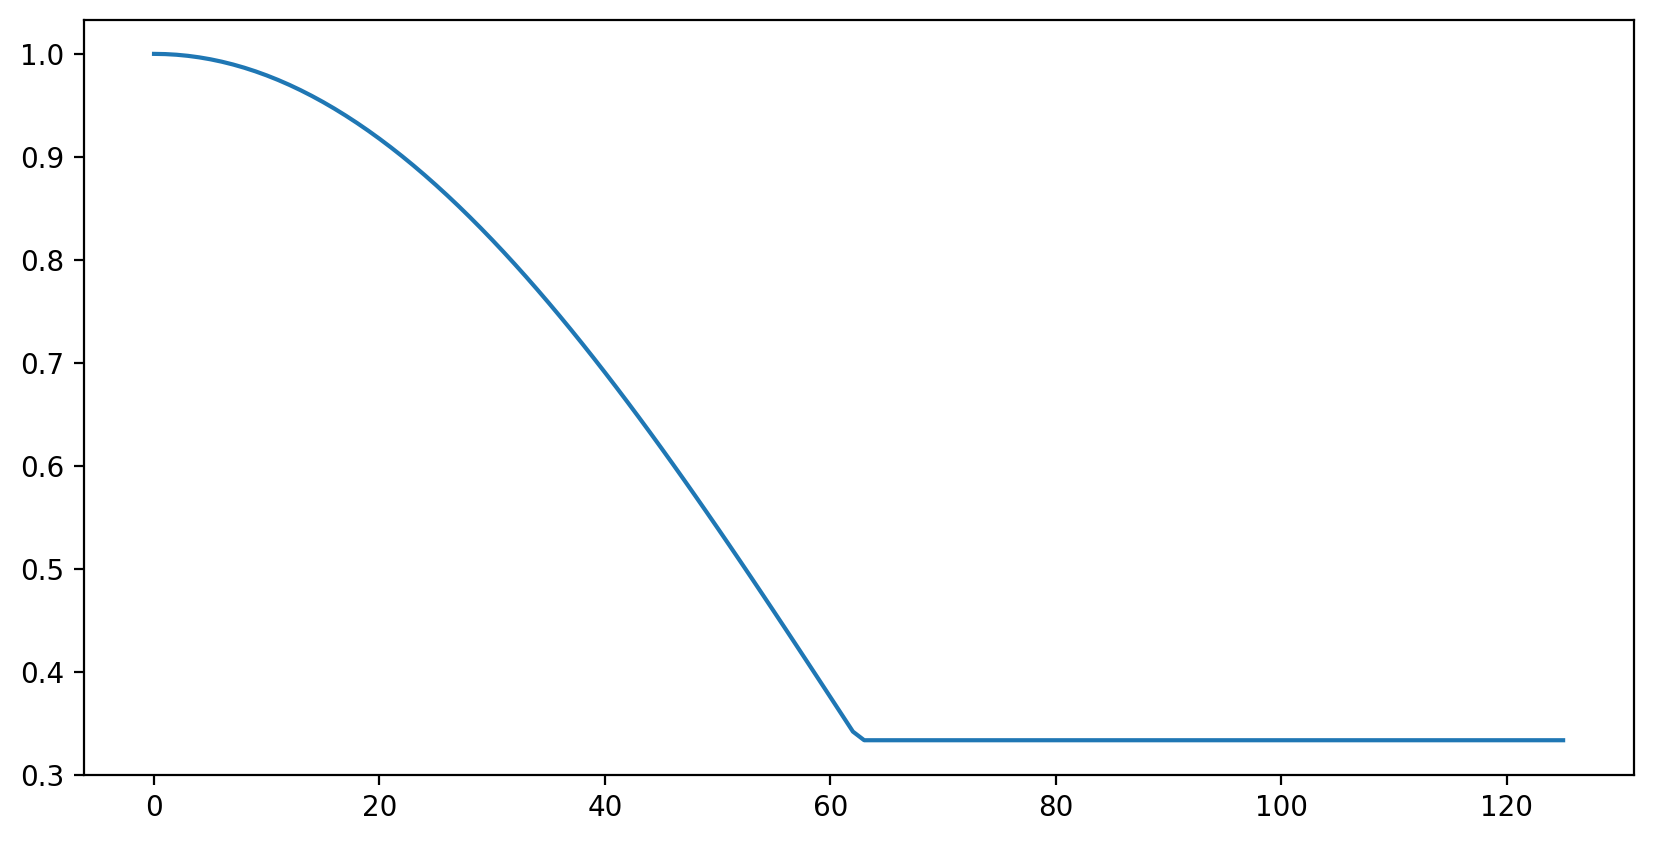

In [61]:
H = np.zeros(126)
for i in range(126):
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/3, 1/3, 1/3], 1, x)
    
    H[i] = max(y)/max(x)


print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(H)


Amplitude of x: 1.0
Amplitude of y: 1.0


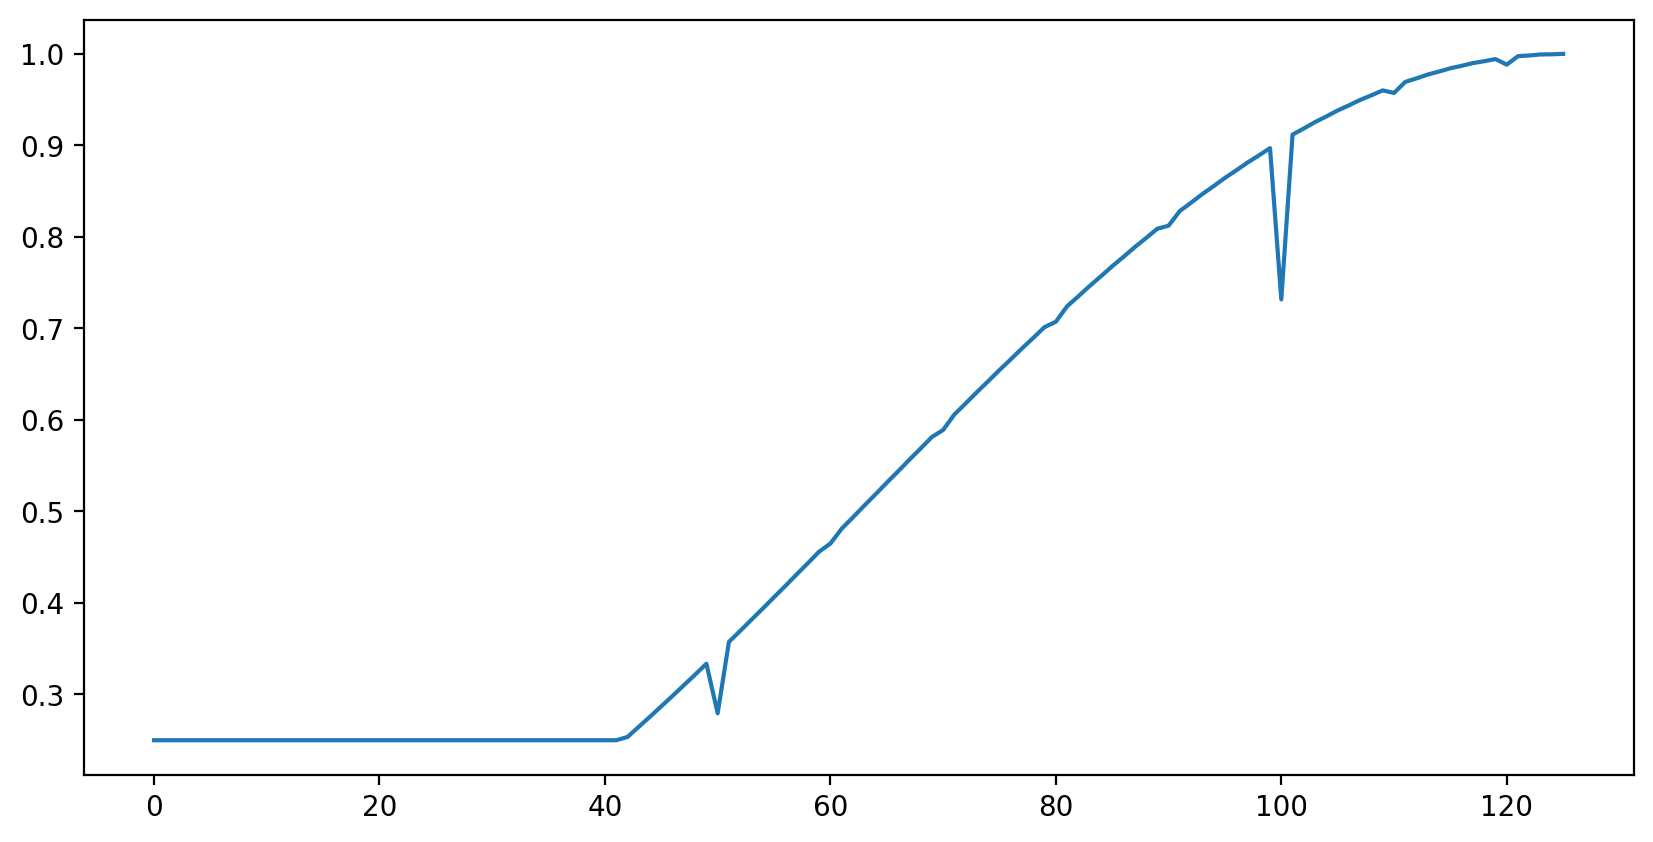

In [62]:
H = np.zeros(126)
for i in range(126):
    x = np.cos(2*np.pi*i*t)
    y = signal.lfilter([1/4, -2/4, 1/4], 1, x)
    
    H[i] = max(y)/max(x)


print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(H)